In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv('Travel.csv')

In [4]:
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [5]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

# Data Cleaning

1.Handling missing values

2.Handling Duplicates

3.Check DataType

4.Understand the Dataset

In [7]:
# check all categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [8]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [9]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [10]:
df['Gender']=df['Gender'].replace('Fe Male','Female')

In [11]:
# check all categories
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [12]:
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [13]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

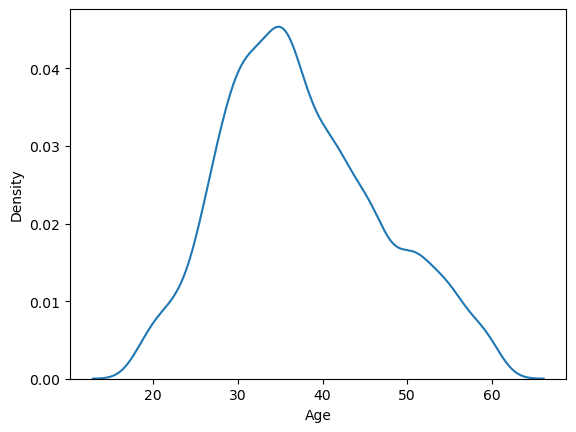

In [14]:
sns.kdeplot(df['Age'])
plt.show()

In [15]:
# checking missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [16]:
# statistics on numerical column(null columns)

df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### imputing median value for Age column
### imputing mode value for type of contact column
### imputing median value for DurationOfPitch column
### imputing mode value for NumberOfFollowups column
### imputing mode value for PreferredPropertyStar column
### imputing median value for NumberOfTrips column
### imputing mode value for NumberOfChildrenVisiting column
### imputing median value for MonthlyIncome column

In [17]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0],inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(),inplace=True)
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0],inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0],inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(),inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0],inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)





In [18]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [19]:
df.drop('CustomerID',axis=1,inplace=True)

In [20]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Unmarried,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Unmarried,3.0,0,5,0,2.0,Executive,20289.0


# Feature Engineering


In [21]:
# create new column for feature
df['totalVisiting']=df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']
df.drop(['NumberOfChildrenVisiting','NumberOfPersonVisiting'],axis=1,inplace=True)

In [22]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,totalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Unmarried,3.0,1,3,1,Executive,21212.0,6.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Unmarried,3.0,0,5,0,Executive,20289.0,5.0


In [23]:
len(df.columns)

18

In [24]:
# get all numerical feature
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print("Num of numerical feature: ",len(num_features))

Num of numerical feature:  12


In [25]:
# get all categorical feature
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print("Num of numerical feature: ",len(cat_features))

Num of numerical feature:  6


In [26]:
# get all discrete feature
discreate_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print("Num of discrete feature: ",len(discreate_features))

Num of discrete feature:  9


In [27]:
# get all continuous feature
continuous_features=[feature for feature in num_features if feature not in  discreate_features]
print("Num of continuous feature: ",len(continuous_features))

Num of continuous feature:  3


## train test split and model training

In [28]:
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
# create column transformer with 3 types of transformers
cat_features=X.select_dtypes(include='object').columns
num_features=X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [31]:
## applying transformation in trainnig dataset
X_train=preprocessor.fit_transform(X_train)## applying transformation in trainnig dataset


In [32]:
print(X_test.columns)
print(preprocessor.transformers_)


Index(['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation',
       'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'totalVisiting'],
      dtype='object')
[('OneHotEncoder', OneHotEncoder(drop='first'), Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')), ('StandardScaler', StandardScaler(), Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'totalVisiting'],
      dtype='object'))]


In [33]:
X_test=preprocessor.transform(X_test)

# Random Forest Classifier Training

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,recall_score,precision_score,f1_score,roc_auc_score,roc_curve


In [35]:
models={
    "Decision tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "AdaBoost " : AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) # train model

    # make predictions

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)


    # trainnig set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_curve=roc_auc_score(y_train,y_train_pred)

      # test set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_curve=roc_auc_score(y_test,y_test_pred)


    print(list(models.keys())[i])

    print(" model performances of training set")
    print("accuracy",model_train_accuracy)
    print(model_train_f1)
    print(model_train_precision)
    print(model_train_recall)
    print(model_train_rocauc_curve)


    print("--------------------------------------------")


    print(model_test_accuracy)
    print(model_test_f1)
    print(model_test_precision)
    print(model_test_recall)
    print(model_test_rocauc_curve)


Decision tree
 model performances of training set
accuracy 1.0
1.0
1.0
1.0
1.0
--------------------------------------------
0.9171779141104295
0.7851458885941645
0.7956989247311828
0.774869109947644
0.8632922423944065


Random Forest
 model performances of training set
accuracy 1.0
1.0
1.0
1.0
1.0
--------------------------------------------
0.9253578732106339
0.7667731629392971
0.9836065573770492
0.6282722513089005
0.8128654776239548
AdaBoost 
 model performances of training set
accuracy 0.8565217391304348
0.4867337602927722
0.7307692307692307
0.36488340192043894
0.6670377399416719
--------------------------------------------
0.8353783231083844
0.43109540636042404
0.6630434782608695
0.3193717277486911
0.6399908194016645
Gradient Boost
 model performances of training set
accuracy 0.8938618925831202
0.6381865736704446
0.8755980861244019
0.5020576131687243
0.7428552762479901
--------------------------------------------
0.8588957055214724
0.5208333333333334
0.7731958762886598
0.39267015706806285
0.6823579501985804


In [40]:
# hyperparameter tuning
rf_params={
    "max_depth":[5,8,15 ,None,10],
    "max_features": [5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}
adaboost_params={
    "n_estimators":[50,60,70,80],
    "algorithm": ['SAMME','SAMME.R']
}

In [41]:
adaboost_params

{'n_estimators': [50, 60, 70, 80], 'algorithm': ['SAMME', 'SAMME.R']}

In [42]:
randomcv_models=[
    ("RF",RandomForestClassifier(),rf_params),
    ("AB",AdaBoostClassifier(),adaboost_params)
]

In [43]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80], 'algorithm': ['SAMME', 'SAMME.R']})]

In [44]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name ,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)

    random.fit(X_train,y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(" best params for ",model_name)
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=200; total time=   1.3s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=200; total time=   1.3s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, max_features=5, min_samples_s

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.4s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.4s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.5s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.5s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.4s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.4s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.4s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.6s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.6s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.5s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.4s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.5s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.5s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.5s
[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=   0.6s
[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=   0.6s
[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=   0.5s
 best params for  RF
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 7, 'max_depth': 15}
 best params for  AB
{'n_estimators': 80, 'algorithm': 'SAMME'}


In [45]:
models={
    
    "Random Forest" : RandomForestClassifier(n_estimators=200,min_samples_split=2,max_features=8,max_depth=15),
    "AdaBoost": AdaBoostClassifier(n_estimators=80,algorithm='SAMME')

}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) # train model

    # make predictions

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)


    # trainnig set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_curve=roc_auc_score(y_train,y_train_pred)

      # test set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_curve=roc_auc_score(y_test,y_test_pred)


    print(list(models.keys())[i])

    print(" model performances of training set")
    print("accuracy",model_train_accuracy)
    print(model_train_f1)
    print(model_train_precision)
    print(model_train_recall)
    print(model_train_rocauc_curve)


    print("--------------------------------------------")


    print(model_test_accuracy)
    print(model_test_f1)
    print(model_test_precision)
    print(model_test_recall)
    print(model_test_rocauc_curve)


Random Forest
 model performances of training set
accuracy 0.9989769820971867
0.9972489683631361
1.0
0.9945130315500685
0.9972565157750343
--------------------------------------------
0.934560327198364
0.8048780487804879
0.9635036496350365
0.6910994764397905
0.8423731181436565
AdaBoost
 model performances of training set
accuracy 0.8465473145780051
0.38016528925619836
0.7698744769874477
0.252400548696845
0.6175551941849519
--------------------------------------------
0.83640081799591
0.34959349593495936
0.7818181818181819
0.225130890052356
0.6049415568432047
